In [146]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [147]:
df_features =  pd.read_csv('/localhome/cschiebroek/MDFPs/mdfptools/carl/data_curation/Current_set_2980_all_features_vp_in_log10_Pa.csv')
df_features
#copy with only column molregno,vp_log10pa,Source and standardized_smiles
df_feauture_essentials = df_features[['molregno','vp_log10pa','Source','standardized_smiles','NumHeavyAtoms']]

In [148]:
df_feauture_essentials['vp_log10pa'].value_counts()

vp_log10pa
-3.000000    6
-4.574068    6
-3.728970    5
-4.397977    5
-2.958607    4
            ..
-4.208393    1
-0.139021    1
 3.377661    1
-3.920837    1
 5.397940    1
Name: count, Length: 2680, dtype: int64

In [149]:
import pandas as pd
from rdkit import Chem
#The starting point is this dataframe found on the harddrive of ShuZe Wang, who started the project
df_original = pd.read_csv('/localhome/cschiebroek/ShuZe/vp/data cleaning/cleaned_vp_all.tsv', sep='\t')
#This dataframe can still be found on the harddrive, as well as on Euler in Shuze's work directory
print("Original amount of datapoints: ", len(df_original))
print(df_original['Temperature'].value_counts())   
#As we see. this dataframe has 4436 datapoints, most of which (3098) have a temperature of 298.15K
df_original_298 = df_original[df_original['Temperature'] == 298.15] 
print("Amount of datapoints with temperature 298.15K: ", len(df_original_298))
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
df_original_298['standardized_smiles'] = df_original_298.apply(lambda row: Chem.MolToSmiles(rdMolStandardize.ChargeParent(Chem.MolFromSmiles((row['SMILES'])))), axis=1)

Original amount of datapoints:  4436
Temperature
298.15    3098
293.15    1338
Name: count, dtype: int64
Amount of datapoints with temperature 298.15K:  3098


[10:15:57] Initializing MetalDisconnector
[10:15:57] Running MetalDisconnector
[10:15:57] Initializing Normalizer
[10:15:57] Running Normalizer
[10:15:57] Running LargestFragmentChooser
[10:15:57] Fragment: CCCCCCCCCCCCCCCCCC(=O)OCC(O)[C@H]1OC[C@@H](O)[C@@H]1O
[10:15:57] New largest fragment: CCCCCCCCCCCCCCCCCC(=O)OCC(O)[C@H]1OC[C@@H](O)[C@@H]1O (76)
[10:15:57] Running Uncharger
[10:15:57] Initializing MetalDisconnector
[10:15:57] Running MetalDisconnector
[10:15:57] Initializing Normalizer
[10:15:57] Running Normalizer
[10:15:57] Initializing MetalDisconnector
[10:15:57] Running MetalDisconnector
[10:15:57] Initializing Normalizer
[10:15:57] Running Normalizer
[10:15:57] Running LargestFragmentChooser
[10:15:57] Fragment: CC=CCCCCCC
[10:15:57] New largest fragment: CC=CCCCCCC (27)
[10:15:57] Running Uncharger
[10:15:57] Initializing MetalDisconnector
[10:15:57] Running MetalDisconnector
[10:15:57] Initializing Normalizer
[10:15:57] Running Normalizer
[10:15:57] Initializing MetalDisco

In [150]:
df_original_298

,hash_code,SMILES,Temperature,Vapour Pressure (log10 kPa),Source,standardized_smiles
0,000c0dc393452e54c19cae2c6501b956,[CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2...,298.15,-14.744727,REACH,CCCCCCCCCCCCCCCCCC(=O)OCC(O)[C@H]1OC[C@@H](O)[...
2,0026cd05c00286506e4c0051abcde83f,[CH3]-[CH]=[CH]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-...,298.15,-0.301067,PUBCHEM,CC=CCCCCCC
3,0029fb907f0382cb8ba7913301e791ec,[O]=[C](-[OH])-[c]1:[cH]:[cH]:[c]2:[cH]:[cH]:[...,298.15,-6.053323,OCHEM,O=C(O)c1ccc2ccccc2c1
4,0050ebd8f62aa0dd9dd972b02e277f5b,[Cl]-[CH2]-[O]-[CH2]-[Cl],298.15,0.591625,OCHEM,ClCOCCl
5,0067f638b002221144b4e1108f7d3ae5,[CH3]-[C]#[C]-[CH](-[CH3])-[CH3],298.15,1.227887,CRC,CC#CC(C)C
...,...,...,...,...,...,...
4430,ff4e979f0b36ff50fd00e1edd51b6f76,[Cl]-[c]1:[cH]:[cH]:[c](-[O]-[c]2:[cH]:[c](-[C...,298.15,-6.770000,OCHEM,Clc1ccc(Oc2cc(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c1
4431,ff58752f0a4348832f35917fb8a400b7,[F]-[C](-[F])(-[F])-[Cl],298.15,3.457729,OCHEM,FC(F)(F)Cl
4432,ff95923bf16fe07ac570f8748369e744,[CH3]-[C](=[O])-[C]1=[C](-[CH3])-[CH]2-[CH2]-[...,298.15,2.397940,REACH,CC(=O)C1=C(C)C2CC3(C1)C(C)CCC3C2(C)C
4433,ffa1925cb04fcea328a8b6cae4887000,[O]=[CH]-[C@H](-[OH])-[C@@H](-[OH])-[C@H](-[OH...,298.15,-10.580632,OCHEM,O=C[C@H](O)[C@@H](O)[C@H](O)CO


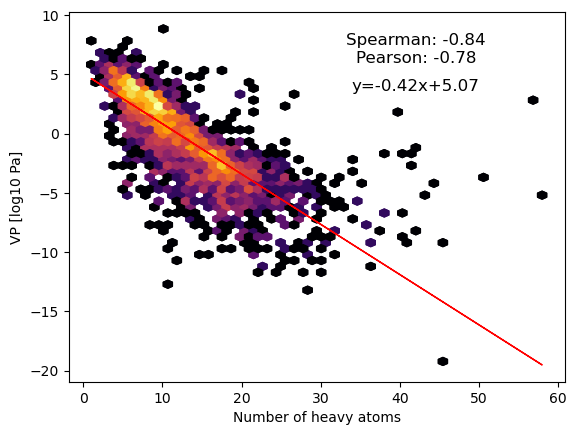

In [221]:
# plot vp against number of heavy atoms
import matplotlib.pyplot as plt
import numpy as np
hexbin = plt.hexbin(df_feauture_essentials['NumHeavyAtoms'], df_feauture_essentials['vp_log10pa'], gridsize=50, cmap='inferno', bins='log', mincnt=1)
counts = plt.hexbin(df_feauture_essentials['NumHeavyAtoms'], df_feauture_essentials['vp_log10pa'], gridsize=50, cmap='inferno', bins='log', mincnt=1).get_array()
spearman = df_feauture_essentials['NumHeavyAtoms'].corr(df_feauture_essentials['vp_log10pa'], method='spearman')
pearson = df_feauture_essentials['NumHeavyAtoms'].corr(df_feauture_essentials['vp_log10pa'], method='pearson')
plt.text(0.7, 0.9, f'Spearman: {np.round(spearman, 2)}\nPearson: {np.round(pearson, 2)}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)
#add liniear regression line and formula
from scipy import stats
x = df_feauture_essentials['NumHeavyAtoms']
y = df_feauture_essentials['vp_log10pa']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x,line,'r-', linewidth=1)
plt.text(0.7, 0.8, f'y={np.round(slope, 2)}x+{np.round(intercept, 2)}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)
plt.xlabel('Number of heavy atoms')
plt.ylabel('VP [log10 Pa]')
plt.savefig('vp_vs_numheavyatoms.png', dpi=300)
plt.show()

y = -0.42398567162021206 x + 5.066915039574392
-0.42398567162021206 x = y - 5.066915039574392
x = (y - 5.066915039574392)/-0.42398567162021206

In [222]:
-0.42398567162021206 * 5 + 5.066915039574392

2.9469866814733314

In [178]:
(3 - 5.066915039574392)/-0.42398567162021206

4.874964363007636

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(df_features['NumHeavyAtoms'].values.reshape(-1, 1), df_features['vp_log10pa'].values.reshape(-1, 1))
print(f'Linear regression: {lr.coef_[0][0]}x + {lr.intercept_[0]}')


Linear regression: -0.42398567162021206x + 5.066915039574392


In [199]:
#get smiles where vp betwen -4 and -3 and number of heavy atoms between 19 and 21
df_peak_one = df_feauture_essentials[(df_feauture_essentials['vp_log10pa'] > -4) & (df_feauture_essentials['vp_log10pa'] < -3) & (df_feauture_essentials['NumHeavyAtoms'] > 19) & (df_feauture_essentials['NumHeavyAtoms'] < 21)]
smiles_peak_one = df_peak_one['standardized_smiles'].tolist()
number_heavy_atoms_peak_one = df_peak_one['NumHeavyAtoms'].tolist()
vp_peak_one = df_peak_one['vp_log10pa'].tolist()
from rdkit.Chem import Draw
# Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in smiles_peak_one], molsPerRow=2, subImgSize=(500, 500), legends=[f'{num_heavy_atoms} heavy atoms\n{vp} log10 Pa' for smi, num_heavy_atoms, vp in zip(smiles_peak_one, number_heavy_atoms_peak_one, vp_peak_one)])
mol1 = Chem.MolFromSmiles(smiles_peak_one[5])
vp1 = vp_peak_one[5]
nha1 = number_heavy_atoms_peak_one[5]


In [206]:
#get smiles where vp betwen -4 and -3 and number of heavy atoms between 19 and 21
df_peak_two = df_feauture_essentials[(df_feauture_essentials['vp_log10pa'] > 2) & (df_feauture_essentials['vp_log10pa'] < 3) & (df_feauture_essentials['NumHeavyAtoms'] == 5)]
smiles_peak_two = df_peak_two['standardized_smiles'].tolist()
number_heavy_atoms_peak_two = df_peak_two['NumHeavyAtoms'].tolist()
vp_peak_two = df_peak_two['vp_log10pa'].tolist()
from rdkit.Chem import Draw
legends = [f'{num_heavy_atoms} heavy atoms\n{round(vp,2)} log10 Pa' for num_heavy_atoms, vp in zip(number_heavy_atoms_peak_two, vp_peak_two)]
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in smiles_peak_two], molsPerRow=2, subImgSize=(500, 500), legends=legends)
mol2 = Chem.MolFromSmiles(smiles_peak_two[8])
vp2 = vp_peak_two[8]
nha2 = number_heavy_atoms_peak_two[8]

In [214]:
#get smiles where vp betwen -4 and -3 and number of heavy atoms between 19 and 21
df_peak_three = df_feauture_essentials[(df_feauture_essentials['vp_log10pa'] < -9)]
smiles_peak_three = df_peak_three['standardized_smiles'].tolist()
number_heavy_atoms_peak_three = df_peak_three['NumHeavyAtoms'].tolist()
vp_peak_three = df_peak_three['vp_log10pa'].tolist()
from rdkit.Chem import Draw
legends = [f'{num_heavy_atoms} heavy atoms\n{round(vp,2)} log10 Pa' for num_heavy_atoms, vp in zip(number_heavy_atoms_peak_three, vp_peak_three)]
# Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in smiles_peak_three], molsPerRow=2, subImgSize=(500, 500), legends=legends)
mol3 = Chem.MolFromSmiles(smiles_peak_three[3])
vp3 = vp_peak_three[3]
nha3 = number_heavy_atoms_peak_three[3]


/localhome/cschiebroek/.conda/envs/mdfp_carl/lib/python3.11/site-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


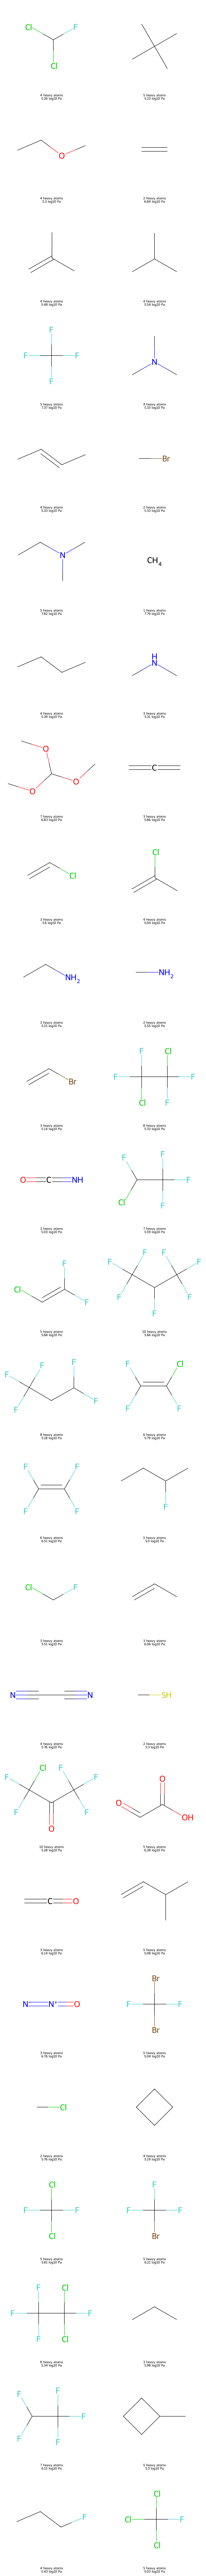

In [215]:
#get smiles where vp betwen -4 and -3 and number of heavy atoms between 19 and 21
df_peak_four = df_feauture_essentials[(df_feauture_essentials['vp_log10pa'] > 5)]
smiles_peak_four = df_peak_four['standardized_smiles'].tolist()
number_heavy_atoms_peak_four = df_peak_four['NumHeavyAtoms'].tolist()
vp_peak_four = df_peak_four['vp_log10pa'].tolist()
from rdkit.Chem import Draw
legends = [f'{num_heavy_atoms} heavy atoms\n{round(vp,2)} log10 Pa' for num_heavy_atoms, vp in zip(number_heavy_atoms_peak_four, vp_peak_four)]
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in smiles_peak_four], molsPerRow=2, subImgSize=(500, 500), legends=legends)

In [ ]:
101325 * 

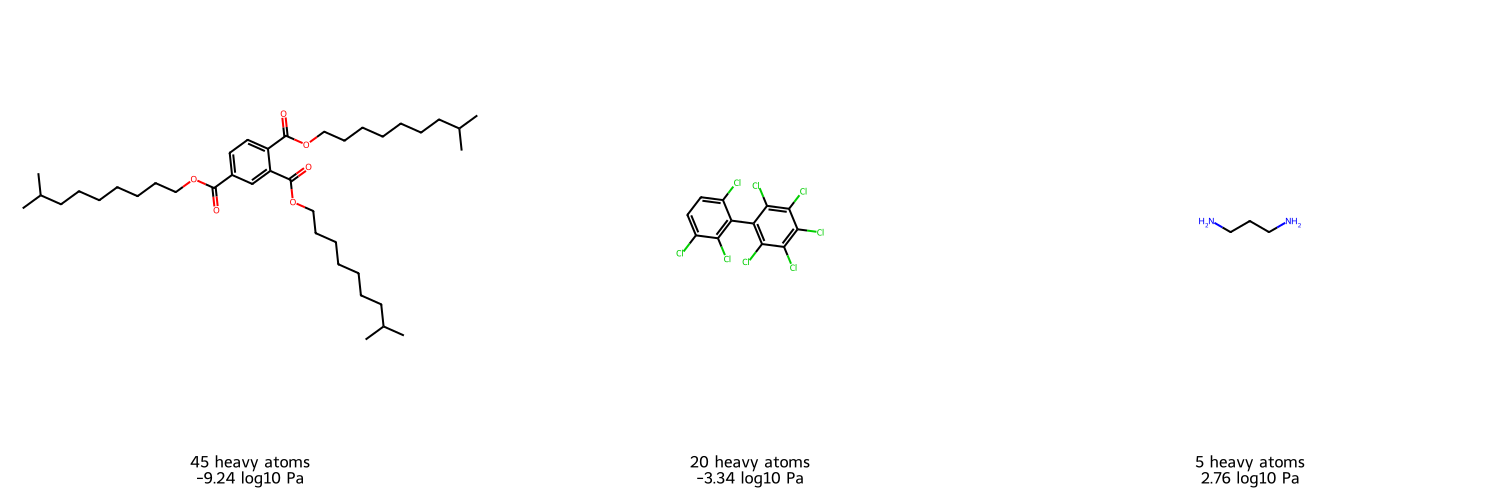

In [220]:
from rdkit.Chem import Draw
mols = [mol3,mol1, mol2]
vps = [vp3,vp1, vp2]
nhas = [nha3,nha1, nha2]
legends = [f'{nha} heavy atoms\n{round(vp,2)} log10 Pa' for nha, vp in zip(nhas, vps)]
Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(500, 500), legends=legends)

/tmp/ipykernel_567871/1827346160.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furthest_points['residuals'] = residuals.iloc[sorted_indices]


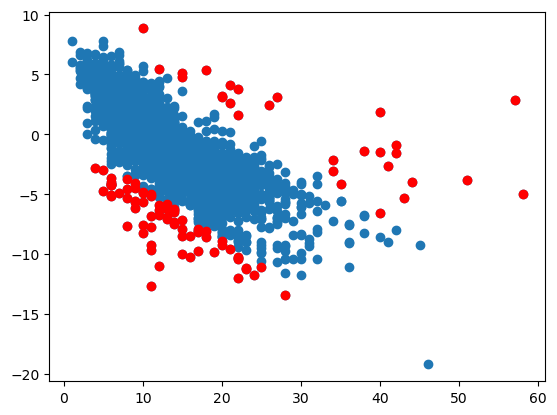

In [16]:
# Calculate the residuals
import numpy as np
residuals = df_features['vp_log10pa'] - (-0.42398567162021217 * df_features['NumHeavyAtoms'] + 5.066915039574393)
sorted_indices = np.argsort(np.abs(residuals))[::-1]
furthest_points = df_features.iloc[sorted_indices]
furthest_points['residuals'] = residuals.iloc[sorted_indices]
mols_sorted_by_error = [Chem.MolFromMolBlock(molblock) for molblock in furthest_points['molblock']]
# Draw.MolsToGridImage(mols_sorted_by_error[:10], molsPerRow=5, subImgSize=(200, 200), legends=[f'{np.round(residual, 2)}' for residual in furthest_points['residuals'][:10]])
hunderd_furthest_points = furthest_points.iloc[:100]
plt.scatter(df_features['NumHeavyAtoms'], df_features['vp_log10pa'])
plt.scatter(hunderd_furthest_points['NumHeavyAtoms'], hunderd_furthest_points['vp_log10pa'], color='red')

In [18]:
hunderd_furthest_points_reduced = hunderd_furthest_points[['molregno', 'vp_log10pa', 'Vapour Pressure (log10 kPa)', 'Source', 'standardized_smiles', 'NumHeavyAtoms', 'residuals','Temperature']]

In [24]:
hunderd_furthest_points_reduced
#add column VP_LR_NHA, where VP is the predicted VP from the linear regression and NHA is the number of heavy atoms -0.42398567162021206x + 5.066915039574392
hunderd_furthest_points_reduced['VP_LR_NHA'] = hunderd_furthest_points_reduced['NumHeavyAtoms'] * -0.42398567162021206 + 5.066915039574392
hunderd_furthest_points_reduced

/tmp/ipykernel_567871/385751811.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hunderd_furthest_points_reduced['VP_LR_NHA'] = hunderd_furthest_points_reduced['NumHeavyAtoms'] * -0.42398567162021206 + 5.066915039574392


,molregno,vp_log10pa,Vapour Pressure (log10 kPa),Source,standardized_smiles,NumHeavyAtoms,residuals,Temperature,VP_LR_NHA
1156,2342,2.823872,-0.176128,REACH,CC(C)(C)c1cc(Cn2c(=O)n(Cc3cc(C(C)(C)C)c(O)c(C(...,57,21.924140,298.15,-19.100268
1210,2398,-5.000000,-8.000000,REACH,CC(C)(C)c1cc(C(C)(CC(=O)OCCOC(=O)CC(C)(c2ccc(O...,58,14.524254,293.15,-19.524254
1671,2875,1.863323,-1.136677,CRC,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)N(C(F)(F)C(F)(F)C...,40,13.755835,298.15,-11.892512
2203,3430,-12.698970,-15.698970,REACH,[N-]=[N+]=C1C(=O)NC(=O)NC1=O,11,-13.102043,298.15,0.403073
311,327,-3.786522,-7.025829,REACH,Cc1cc(C(C)(C)C)c(O)c(C)c1Cn1c(=O)n(Cc2c(C)cc(C...,51,12.769832,293.15,-16.556354
...,...,...,...,...,...,...,...,...,...
98,107,-6.273038,-9.273038,OCHEM,c1ccc2[nH]c(-c3cscn3)nc2c1,14,-5.404154,298.15,-0.868884
2827,4079,-5.000037,-8.000037,OCHEM,OC1C2COC(O2)C(O)C1O,11,-5.403110,298.15,0.403073
2173,3400,-5.843492,-8.843492,OCHEM;REACH,O=C(O)CCCCCCCC(=O)O,13,-5.398593,298.15,-0.444899
2316,3548,-4.109020,-7.109020,REACH,O=c1nc([N+](=O)[O-])[nH][nH]1,9,-5.360064,298.15,1.251044


In [26]:
#ochem uncleaned standardized
df_ochem = pd.read_csv('OCHEM_standardized_not_cleaned.csv')
df_reach = pd.read_csv('REACH_standardized_not_cleaned.csv')

df_reach_25 = df_reach[(df_reach['T (unit)'] == 'C') & (df_reach['T (lowerValue)'] == 25) | (df_reach['T (unit)'] == 'K') & (df_reach['T (lowerValue)'] == 298.15)]
df_ochem_25 = df_ochem[(df_ochem[df_ochem.columns[5]] == '°C') & (df_ochem['Temperature'] == 25) | (df_ochem[df_ochem.columns[5]] == 'K') & (df_ochem['Temperature'] == 298.15)]

In [27]:
df_ochem_reach = pd.merge(df_ochem_25, df_reach_25, how='outer', on=['standardized_smiles', 'Temperature_K'])
df_ochem_reach

,Unnamed: 0,SMILES_x,Vapor Pressure {measured},UNIT {Vapor Pressure},Temperature,UNIT {Temperature},comment (property),measurement method,comment (chemical),source,# of ortho chlorides,UNIT {# of ortho chlorides},Dataset,Quality code,UNIT {Quality code},hash_code,mdfp,Temperature_K,VP_pa,standardized_smiles,NumberOfHeavyAtoms,log10VP_pa,#name,cas,iupacName,P (upperQualifier),P (upperValue),P (lowerQualifier),P (lowerValue),P (unit),T (upperQualifier),T (upperValue),T (lowerQualifier),T (lowerValue),T (unit),VP_Pa,SMILES_y,log10_VP_Pa,NumHeavyAtoms
0,0.0,BrC1=C(OC2=CC=CC=C2)C=CC=C1,0.163,Pa,25.00,°C,supercooled liquid Vp,GC-RT,NaN,NaN,NaN,-,NaN,NaN,-,2f403fe24e39d29f948aa4e9feb6710b,"[14, 2, 0, 1, 0, 0, 0, 0, 1, 0, -13.9325470697...",298.15,0.163,Brc1ccccc1Oc1ccccc1,14.0,-0.787812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3935.0,BrC1=CC=CC=C1OC1=CC=CC=C1,-0.790,log(Pa),298.15,K,NaN,NaN,NaN,NaN,NaN,-,Test,NaN,-,2f403fe24e39d29f948aa4e9feb6710b,"[14, 2, 0, 1, 0, 0, 0, 0, 1, 0, -13.9325470697...",298.15,-0.790,Brc1ccccc1Oc1ccccc1,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,BrC1=CC(OC2=CC=CC=C2)=CC=C1,0.128,Pa,25.00,°C,supercooled liquid Vp,GC-RT,NaN,NaN,NaN,-,NaN,NaN,-,5de10590a173bcca8091c5a2e49b3a8d,"[14, 2, 0, 1, 0, 0, 0, 0, 1, 0, -60.2223414903...",298.15,0.128,Brc1cccc(Oc2ccccc2)c1,14.0,-0.892790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3930.0,BrC1=CC(OC2=CC=CC=C2)=CC=C1,-0.890,log(Pa),298.15,K,NaN,NaN,NaN,NaN,NaN,-,Test,NaN,-,5de10590a173bcca8091c5a2e49b3a8d,"[14, 2, 0, 1, 0, 0, 0, 0, 1, 0, -60.2223414903...",298.15,-0.890,Brc1cccc(Oc2ccccc2)c1,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,BrC1=CC=C(OC2=CC=CC=C2)C=C1,0.259,Pa,25.00,°C,subcooled liquid Vp,GC-RT,NaN,NaN,NaN,-,NaN,NaN,-,1dc397b6c45db1b753a8d3c809ae4c35,NaN,298.15,0.259,Brc1ccc(Oc2ccccc2)cc1,14.0,-0.586700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,298.15,NaN,C=COC(=O)C(CC)CCCC,NaN,NaN,vinyl 2-ethylhexanoate,94-04-2,vinyl 2-ethylhexanoate,NaN,NaN,NaN,55.000000,Pa,NaN,NaN,NaN,25.0,C,55.000000,CCCCC(CC)C(=O)OC=C,1.740363,12.0
6022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,298.15,NaN,C=COC(=O)CCCCCCCCCCC,NaN,NaN,vinyl laurate,2146-71-6,Vinyl laurate,NaN,NaN,NaN,0.280000,Pa,NaN,NaN,NaN,25.0,C,0.280000,CCCCCCCCCCCC(=O)OC=C,-0.552842,16.0
6023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,298.15,NaN,C=COC(=O)CCCCCCCCCCC,NaN,NaN,vinyl laurate,2146-71-6,Vinyl laurate,NaN,NaN,NaN,0.711000,Pa,NaN,NaN,NaN,25.0,C,0.711000,CCCCCCCCCCCC(=O)OC=C,-0.148130,16.0
6024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,298.15,NaN,O=c1occo1,NaN,NaN,vinylene carbonate,872-36-6,"1,3-dioxol-2-one",NaN,NaN,NaN,335.000000,Pa,NaN,NaN,NaN,25.0,C,335.000000,O=C1OC=CO1,2.525045,6.0


In [28]:
df_ochem_reach_errors = pd.merge(df_ochem_reach, hunderd_furthest_points_reduced, how='outer', on=['standardized_smiles'])
df_ochem_reach_errors

,Unnamed: 0,SMILES_x,Vapor Pressure {measured},UNIT {Vapor Pressure},Temperature_x,UNIT {Temperature},comment (property),measurement method,comment (chemical),source,# of ortho chlorides,UNIT {# of ortho chlorides},Dataset,Quality code,UNIT {Quality code},hash_code,mdfp,Temperature_K,VP_pa,standardized_smiles,NumberOfHeavyAtoms,log10VP_pa,#name,cas,iupacName,P (upperQualifier),P (upperValue),P (lowerQualifier),P (lowerValue),P (unit),T (upperQualifier),T (upperValue),T (lowerQualifier),T (lowerValue),T (unit),VP_Pa,SMILES_y,log10_VP_Pa,NumHeavyAtoms_x,molregno,vp_log10pa,Vapour Pressure (log10 kPa),Source,NumHeavyAtoms_y,residuals,Temperature_y,VP_LR_NHA
0,0.0,BrC1=C(OC2=CC=CC=C2)C=CC=C1,0.163,Pa,25.00,°C,supercooled liquid Vp,GC-RT,NaN,NaN,NaN,-,NaN,NaN,-,2f403fe24e39d29f948aa4e9feb6710b,"[14, 2, 0, 1, 0, 0, 0, 0, 1, 0, -13.9325470697...",298.15,0.163,Brc1ccccc1Oc1ccccc1,14.0,-0.787812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3935.0,BrC1=CC=CC=C1OC1=CC=CC=C1,-0.790,log(Pa),298.15,K,NaN,NaN,NaN,NaN,NaN,-,Test,NaN,-,2f403fe24e39d29f948aa4e9feb6710b,"[14, 2, 0, 1, 0, 0, 0, 0, 1, 0, -13.9325470697...",298.15,-0.790,Brc1ccccc1Oc1ccccc1,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,BrC1=CC(OC2=CC=CC=C2)=CC=C1,0.128,Pa,25.00,°C,supercooled liquid Vp,GC-RT,NaN,NaN,NaN,-,NaN,NaN,-,5de10590a173bcca8091c5a2e49b3a8d,"[14, 2, 0, 1, 0, 0, 0, 0, 1, 0, -60.2223414903...",298.15,0.128,Brc1cccc(Oc2ccccc2)c1,14.0,-0.892790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3930.0,BrC1=CC(OC2=CC=CC=C2)=CC=C1,-0.890,log(Pa),298.15,K,NaN,NaN,NaN,NaN,NaN,-,Test,NaN,-,5de10590a173bcca8091c5a2e49b3a8d,"[14, 2, 0, 1, 0, 0, 0, 0, 1, 0, -60.2223414903...",298.15,-0.890,Brc1cccc(Oc2ccccc2)c1,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,BrC1=CC=C(OC2=CC=CC=C2)C=C1,0.259,Pa,25.00,°C,subcooled liquid Vp,GC-RT,NaN,NaN,NaN,-,NaN,NaN,-,1dc397b6c45db1b753a8d3c809ae4c35,NaN,298.15,0.259,Brc1ccc(Oc2ccccc2)cc1,14.0,-0.586700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,298.15,NaN,O=c1occo1,NaN,NaN,vinylene carbonate,872-36-6,"1,3-dioxol-2-one",NaN,NaN,NaN,335.000000,Pa,NaN,NaN,NaN,25.0,C,335.000000,O=C1OC=CO1,2.525045,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,298.15,NaN,OC1COC(O)C(O)C1O,NaN,NaN,xylose,58-86-6,"(2S,3R,4S; 5R)-oxane-2,3,4,5-tetrol",NaN,NaN,NaN,0.000049,Pa,NaN,NaN,NaN,25.0,C,0.000049,OC1COC(O)C(O)C1O,-4.309804,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)N(C(F)(F)C(F)(F)C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2875.0,1.863323,-1.136677,CRC,40.0,13.755835,298.15,-11.892512
6027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FC(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,673.0,3.770852,0.770852,CRC,22.0,8.031622,298.15,-4.260770


In [29]:
test_df = df_ochem_reach_errors[df_ochem_reach_errors['standardized_smiles'].isin(hunderd_furthest_points_reduced['standardized_smiles'])]
#get
test_df = test_df[[test_df.columns[2],test_df.columns[3] ,'Temperature_K', 'P (lowerValue)', 'P (unit)','vp_log10pa','VP_LR_NHA', 'residuals','standardized_smiles','Source']]
#sort by residuals
test_df = test_df.sort_values(by=['residuals'], ascending=False)
test_df.head(50)

,Vapor Pressure {measured},UNIT {Vapor Pressure},Temperature_K,P (lowerValue),P (unit),vp_log10pa,VP_LR_NHA,residuals,standardized_smiles,Source
4829,NaN,NaN,298.15,5.000000e+00,mm Hg,2.823872,-19.100268,21.924140,CC(C)(C)c1cc(Cn2c(=O)n(Cc3cc(C(C)(C)C)c(O)c(C(...,REACH
5616,NaN,NaN,298.15,1.000000e-07,hPa,-5.000000,-19.524254,14.524254,CC(C)(C)c1cc(C(C)(CC(=O)OCCOC(=O)CC(C)(c2ccc(O...,REACH
6026,NaN,NaN,NaN,NaN,NaN,1.863323,-11.892512,13.755835,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)N(C(F)(F)C(F)(F)C...,CRC
4830,NaN,NaN,298.15,1.634850e-04,Pa,-3.786522,-16.556354,12.769832,Cc1cc(C(C)(C)C)c(O)c(C)c1Cn1c(=O)n(Cc2c(C)cc(C...,REACH
5824,NaN,NaN,298.15,1.160000e-01,Pa,-0.935542,-12.740483,11.804941,CCCCCCCCCCCCCCCCCC(=O)NCCNC(=O)CCCCCCCCCCCCCCCCC,REACH
5823,NaN,NaN,298.15,2.970000e-02,Pa,-1.527244,-12.740483,11.213240,CCCCCCCC/C=C\CCCCCCCC(=O)NCCNC(=O)CCCCCCC/C=C\...,REACH
6009,NaN,NaN,298.15,2.380000e-04,mm Hg,-1.498521,-11.892512,10.393991,CCCCC(CC)COC(=O)CC(CC(=O)OCC(CC)CCCC)(OC(C)=O)...,REACH
5574,NaN,NaN,298.15,4.100000e-04,hPa,-1.387216,-11.044540,9.657324,CCCCCCCCCCCCCCCCCCSSCCCCCCCCCCCCCCCCCC,REACH
5440,NaN,NaN,298.15,2.100000e-03,Pa,-2.677781,-12.316497,9.638717,CCOC(=O)CC(NC1CCC(CC2CCC(NC(CC(=O)OCC)C(=O)OCC...,REACH
5822,NaN,NaN,298.15,1.000000e-04,Pa,-4.000000,-13.588455,9.588455,CCCCCCC(O)CCCCCCCCCCC(=O)NCCNC(=O)CCCCCCCCCCC(...,REACH


In [30]:
#get df with duplicate smiles
test_df_dups = test_df[test_df.duplicated(['standardized_smiles'], keep=False)]
test_df_dups

,Vapor Pressure {measured},UNIT {Vapor Pressure},Temperature_K,P (lowerValue),P (unit),vp_log10pa,VP_LR_NHA,residuals,standardized_smiles,Source
237,2.000000e+03,mm Hg,298.15,NaN,NaN,5.427966,-0.020913,5.448879,FC(=C(F)C(F)(F)F)C(F)(F)F,OCHEM
238,5.430000e+00,log(Pa),298.15,NaN,NaN,5.427966,-0.020913,5.448879,FC(=C(F)C(F)(F)F)C(F)(F)F,OCHEM
5363,NaN,NaN,298.15,2.710000e-07,Pa,-6.567031,-11.892512,5.325481,CCCCN(CCCC)c1ccc2c(c1)Oc1cc(C)c(Nc3ccccc3)cc1C...,REACH
5362,NaN,NaN,298.15,2.710000e-07,Pa,-6.567031,-11.892512,5.325481,CCCCN(CCCC)c1ccc2c(c1)Oc1cc(C)c(Nc3ccccc3)cc1C...,REACH
5819,NaN,NaN,298.15,1.820000e-04,Pa,-3.742328,1.675030,-5.417358,CC(=O)NNC(C)=O,REACH
5818,NaN,NaN,298.15,1.800000e-04,Pa,-3.742328,1.675030,-5.417358,CC(=O)NNC(C)=O,REACH
5393,NaN,NaN,298.15,2.600000e-07,mm Hg,-4.458028,1.251044,-5.709072,NC(CC(=O)O)C(=O)O,REACH
5394,NaN,NaN,298.15,3.500000e-05,Pa,-4.458028,1.251044,-5.709072,NC(CC(=O)O)C(=O)O,REACH
3160,9.800000e-08,mm Hg,298.15,NaN,NaN,-4.883872,0.827058,-5.710930,O=C(O)CNCP(=O)(O)O,OCHEM
3161,6.750000e-08,mm Hg,298.15,NaN,NaN,-4.883872,0.827058,-5.710930,O=C(O)CNCP(=O)(O)O,OCHEM


In [31]:
np.log10(2.000000e+03	* 133.322)

5.4259318156723415

In [32]:
test_df[test_df['standardized_smiles'] == 'CC(C)(C)c1cc(Cn2c(=O)n(Cc3cc(C(C)(C)C)c(O)c(C(C)(C)C)c3)c(=O)n(Cc3cc(C(C)(C)C)c(O)c(C(C)(C)C)c3)c2=O)cc(C(C)(C)C)c1O']

,Vapor Pressure {measured},UNIT {Vapor Pressure},Temperature_K,P (lowerValue),P (unit),vp_log10pa,VP_LR_NHA,residuals,standardized_smiles,Source
4829,NaN,NaN,298.15,5.0,mm Hg,2.823872,-19.100268,21.92414,CC(C)(C)c1cc(Cn2c(=O)n(Cc3cc(C(C)(C)C)c(O)c(C(...,REACH


In [33]:
from rdkit import Chem
from rdkit.Chem import Descriptors
mol = Chem.MolFromSmiles('CC(C)(C)c1cc(Cn2c(=O)n(Cc3cc(C(C)(C)C)c(O)c(C(C)(C)C)c3)c(=O)n(Cc3cc(C(C)(C)C)c(O)c(C(C)(C)C)c3)c2=O)cc(C(C)(C)C)c1O')
#get molar weight
Chem.Descriptors.ExactMolWt(mol)

783.518636928

In [34]:
133.32 *1.0 * 10E-10

1.3332e-07

In [35]:
np.log10(5.0* 133.322)

2.8238718243443794

In [45]:
np.NaN

nan

In [49]:
import pandas as pd
df_dropped = pd.DataFrame({'Standardized_smiles': ['CC(C)(C)c1cc(Cn2c(=O)n(Cc3cc(C(C)(C)C)c(O)c(C(C)(C)C)c3)c(=O)n(Cc3cc(C(C)(C)C)c(O)c(C(C)(C)C)c3)c2=O)cc(C(C)(C)C)c1O'], "SourceCorre" : ["REACH"],'Comments': ["Dropped: only relative values reported"],'Corrected value original': [np.NaN], 'Corrected value unit' : [np.NaN], 'New value log10(Pa)': [np.NaN]})
df2 = {'Standardized_smiles': ['CC(C)(C)c1cc(Cn2c(=O)n(Cc3cc(C(C)(C)C)c(O)c(C(C)(C)C)c3)c(=O)n(Cc3cc(C(C)(C)C)c(O)c(C(C)(C)C)c3)c2=O)cc(C(C)(C)C)c1O'], "Source" : ["REACH"],'Comments': ["Dropped: only relative values reported"],'Corrected value original': [np.NaN], 'Corrected value unit' : [np.NaN], 'New value log10(Pa)': [np.NaN]}

AttributeError: 'DataFrame' object has no attribute 'append'

In [37]:
top100_smiles_high_res = hunderd_furthest_points_reduced['standardized_smiles'].tolist()

In [38]:
import cirpy
print(cirpy.resolve(top100_smiles_high_res[1], 'cas'))

['159394-41-9', '32509-66-3']


In [53]:
top100_smiles_high_res[0]

'CC(C)(C)c1cc(Cn2c(=O)n(Cc3cc(C(C)(C)C)c(O)c(C(C)(C)C)c3)c(=O)n(Cc3cc(C(C)(C)C)c(O)c(C(C)(C)C)c3)c2=O)cc(C(C)(C)C)c1O'

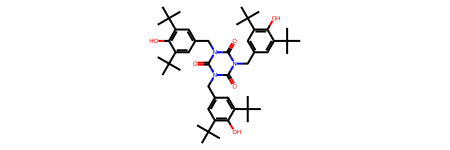

In [52]:
Chem.MolFromSmiles(top100_smiles_high_res[0])

In [40]:
test_df.head(50)

,Vapor Pressure {measured},UNIT {Vapor Pressure},Temperature_K,P (lowerValue),P (unit),vp_log10pa,VP_LR_NHA,residuals,standardized_smiles,Source
4829,NaN,NaN,298.15,5.000000e+00,mm Hg,2.823872,-19.100268,21.924140,CC(C)(C)c1cc(Cn2c(=O)n(Cc3cc(C(C)(C)C)c(O)c(C(...,REACH
5616,NaN,NaN,298.15,1.000000e-07,hPa,-5.000000,-19.524254,14.524254,CC(C)(C)c1cc(C(C)(CC(=O)OCCOC(=O)CC(C)(c2ccc(O...,REACH
6026,NaN,NaN,NaN,NaN,NaN,1.863323,-11.892512,13.755835,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)N(C(F)(F)C(F)(F)C...,CRC
4830,NaN,NaN,298.15,1.634850e-04,Pa,-3.786522,-16.556354,12.769832,Cc1cc(C(C)(C)C)c(O)c(C)c1Cn1c(=O)n(Cc2c(C)cc(C...,REACH
5824,NaN,NaN,298.15,1.160000e-01,Pa,-0.935542,-12.740483,11.804941,CCCCCCCCCCCCCCCCCC(=O)NCCNC(=O)CCCCCCCCCCCCCCCCC,REACH
5823,NaN,NaN,298.15,2.970000e-02,Pa,-1.527244,-12.740483,11.213240,CCCCCCCC/C=C\CCCCCCCC(=O)NCCNC(=O)CCCCCCC/C=C\...,REACH
6009,NaN,NaN,298.15,2.380000e-04,mm Hg,-1.498521,-11.892512,10.393991,CCCCC(CC)COC(=O)CC(CC(=O)OCC(CC)CCCC)(OC(C)=O)...,REACH
5574,NaN,NaN,298.15,4.100000e-04,hPa,-1.387216,-11.044540,9.657324,CCCCCCCCCCCCCCCCCCSSCCCCCCCCCCCCCCCCCC,REACH
5440,NaN,NaN,298.15,2.100000e-03,Pa,-2.677781,-12.316497,9.638717,CCOC(=O)CC(NC1CCC(CC2CCC(NC(CC(=O)OCC)C(=O)OCC...,REACH
5822,NaN,NaN,298.15,1.000000e-04,Pa,-4.000000,-13.588455,9.588455,CCCCCCC(O)CCCCCCCCCCC(=O)NCCNC(=O)CCCCCCCCCCC(...,REACH


In [41]:
hunderd_furthest_points_reduced

,molregno,vp_log10pa,Vapour Pressure (log10 kPa),Source,standardized_smiles,NumHeavyAtoms,residuals,Temperature,VP_LR_NHA
1156,2342,2.823872,-0.176128,REACH,CC(C)(C)c1cc(Cn2c(=O)n(Cc3cc(C(C)(C)C)c(O)c(C(...,57,21.924140,298.15,-19.100268
1210,2398,-5.000000,-8.000000,REACH,CC(C)(C)c1cc(C(C)(CC(=O)OCCOC(=O)CC(C)(c2ccc(O...,58,14.524254,293.15,-19.524254
1671,2875,1.863323,-1.136677,CRC,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)N(C(F)(F)C(F)(F)C...,40,13.755835,298.15,-11.892512
2203,3430,-12.698970,-15.698970,REACH,[N-]=[N+]=C1C(=O)NC(=O)NC1=O,11,-13.102043,298.15,0.403073
311,327,-3.786522,-7.025829,REACH,Cc1cc(C(C)(C)C)c(O)c(C)c1Cn1c(=O)n(Cc2c(C)cc(C...,51,12.769832,293.15,-16.556354
...,...,...,...,...,...,...,...,...,...
98,107,-6.273038,-9.273038,OCHEM,c1ccc2[nH]c(-c3cscn3)nc2c1,14,-5.404154,298.15,-0.868884
2827,4079,-5.000037,-8.000037,OCHEM,OC1C2COC(O2)C(O)C1O,11,-5.403110,298.15,0.403073
2173,3400,-5.843492,-8.843492,OCHEM;REACH,O=C(O)CCCCCCCC(=O)O,13,-5.398593,298.15,-0.444899
2316,3548,-4.109020,-7.109020,REACH,O=c1nc([N+](=O)[O-])[nH][nH]1,9,-5.360064,298.15,1.251044


In [100]:
test_df.head(50)

,Vapor Pressure {measured},UNIT {Vapor Pressure},Temperature_K,P (lowerValue),P (unit),vp_log10pa,VP_LR_NHA,residuals,standardized_smiles,Source
4829,NaN,NaN,298.15,5.000000e+00,mm Hg,2.823872,-19.100268,21.924140,CC(C)(C)c1cc(Cn2c(=O)n(Cc3cc(C(C)(C)C)c(O)c(C(...,REACH
5616,NaN,NaN,298.15,1.000000e-07,hPa,-5.000000,-19.524254,14.524254,CC(C)(C)c1cc(C(C)(CC(=O)OCCOC(=O)CC(C)(c2ccc(O...,REACH
6026,NaN,NaN,NaN,NaN,NaN,1.863323,-11.892512,13.755835,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)N(C(F)(F)C(F)(F)C...,CRC
4830,NaN,NaN,298.15,1.634850e-04,Pa,-3.786522,-16.556354,12.769832,Cc1cc(C(C)(C)C)c(O)c(C)c1Cn1c(=O)n(Cc2c(C)cc(C...,REACH
5824,NaN,NaN,298.15,1.160000e-01,Pa,-0.935542,-12.740483,11.804941,CCCCCCCCCCCCCCCCCC(=O)NCCNC(=O)CCCCCCCCCCCCCCCCC,REACH
5823,NaN,NaN,298.15,2.970000e-02,Pa,-1.527244,-12.740483,11.213240,CCCCCCCC/C=C\CCCCCCCC(=O)NCCNC(=O)CCCCCCC/C=C\...,REACH
6009,NaN,NaN,298.15,2.380000e-04,mm Hg,-1.498521,-11.892512,10.393991,CCCCC(CC)COC(=O)CC(CC(=O)OCC(CC)CCCC)(OC(C)=O)...,REACH
5574,NaN,NaN,298.15,4.100000e-04,hPa,-1.387216,-11.044540,9.657324,CCCCCCCCCCCCCCCCCCSSCCCCCCCCCCCCCCCCCC,REACH
5440,NaN,NaN,298.15,2.100000e-03,Pa,-2.677781,-12.316497,9.638717,CCOC(=O)CC(NC1CCC(CC2CCC(NC(CC(=O)OCC)C(=O)OCC...,REACH
5822,NaN,NaN,298.15,1.000000e-04,Pa,-4.000000,-13.588455,9.588455,CCCCCCC(O)CCCCCCCCCCC(=O)NCCNC(=O)CCCCCCCCCCC(...,REACH


In [64]:
def curate(i):
    smiles = top100_smiles_high_res[i]
    print("Smiles:", smiles)
    cas = cirpy.resolve(smiles, 'cas')
    print("CAS:", cas)
    # Get values for columns 1 and 4 from test_df
    vp_ochem = test_df.iloc[i, 0]
    unit_vp_ochem = test_df.iloc[i, 1]
    vp_reach = test_df.iloc[i, 3]
    unit_vp_reach = test_df.iloc[i, 4]
    vp_in_log10pa = test_df.iloc[i, 5]
    source = test_df.iloc[i, 9]
    # Print all values
    print("VP_OCHEM:", vp_ochem)
    print("Unit_VP_OCHEM:", unit_vp_ochem)
    print("VP_REACH:", vp_reach)
    print("Unit_VP_REACH:", unit_vp_reach)
    print("VP_in_log10Pa:", vp_in_log10pa)
    print("Source:", source)
    

In [65]:
i = 0

22
Smiles: FC(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F
CAS: ['375-83-7', '27213-61-2']
VP_OCHEM: nan
Unit_VP_OCHEM: nan
VP_REACH: 0.000828
Unit_VP_REACH: Pa
VP_in_log10Pa: -3.08196966321512
Source: REACH


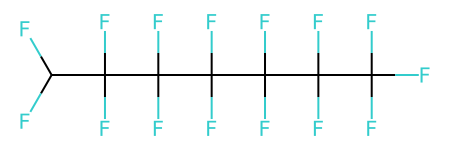

In [139]:
i += 1
print(i)
curate(i)
Chem.MolFromSmiles(top100_smiles_high_res[i])

In [140]:
df = pd.read_csv('data_curation.csv')
df

,Standardized_smiles,Source,Corrected_value_original,Corrected_value_original_units,vp_log10Pa,Comments,Link
0,CC(C)(C)c1cc(Cn2c(=O)n(Cc3cc(C(C)(C)C)c(O)c(C(...,REACH,NaN,NaN,NaN,Dropped: only relative values reported,https://echa.europa.eu/registration-dossier/-/...
1,CC(C)(C)c1cc(C(C)(CC(=O)OCCOC(=O)CC(C)(c2ccc(O...,REACH,NaN,NaN,NaN,Dropped: below detection limit,https://echa.europa.eu/registration-dossier/-/...
2,[N-]=[N+]=C1C(=O)NC(=O)NC1=O,REACH,NaN,NaN,NaN,Dropped: calculated,https://echa.europa.eu/registration-dossier/-/...
3,Cc1cc(C(C)(C)C)c(O)c(C)c1Cn1c(=O)n(Cc2c(C)cc(C...,REACH,9.422600e-05,Pa,-4.025829,Clausius-Clapeyron,https://echa.europa.eu/registration-dossier/-/...
4,CCCCCCCCCCCCCCCCCC(=O)NCCNC(=O)CCCCCCCCCCCCCCCCC,REACH,NaN,NaN,NaN,Contradicting with SDS https://www.palmerholla...,https://echa.europa.eu/registration-dossier/-/...
5,CCCCCCCC/C=C\CCCCCCCC(=O)NCCNC(=O)CCCCCCC/C=C\...,REACH,NaN,NaN,NaN,QSPR,https://echa.europa.eu/registration-dossier/-/...
6,O=C[C@H](O)[C@@H](O)[C@H](O)[C@H](O)CO,REACH,NaN,NaN,NaN,Not found,NaN
7,CCCCC(CC)COC(=O)CC(CC(=O)OCC(CC)CCCC)(OC(C)=O)...,REACH,NaN,NaN,NaN,QSPR,https://echa.europa.eu/registration-dossier/-/...
8,Cn1cnc2ncnc-2c1N,REACH,NaN,NaN,NaN,"Not found in REACH, found in OCHEM. Here it co...",NaN
9,CCCCCCCCCCCCCCCCCCSSCCCCCCCCCCCCCCCCCC,REACH,NaN,NaN,NaN,VP only found at 20 degrees,https://echa.europa.eu/registration-dossier/-/...


In [133]:
df_ochem_25[df_ochem_25['standardized_smiles'] == top100_smiles_high_res[i]]

,Unnamed: 0,SMILES,Vapor Pressure {measured},UNIT {Vapor Pressure},Temperature,UNIT {Temperature},comment (property),measurement method,comment (chemical),source,# of ortho chlorides,UNIT {# of ortho chlorides},Dataset,Quality code,UNIT {Quality code},hash_code,mdfp,Temperature_K,VP_pa,standardized_smiles,NumberOfHeavyAtoms,log10VP_pa


In [99]:
Chem.Descriptors.ExactMolWt(Chem.MolFromSmiles(top100_smiles_high_res[i]))

149.070145224

In [134]:
test_df.iloc[i, :]

Vapor Pressure {measured}                                       NaN
UNIT {Vapor Pressure}                                           NaN
Temperature_K                                                298.15
P (lowerValue)                                                443.0
P (unit)                                                         Pa
vp_log10pa                                                 2.646404
VP_LR_NHA                                                 -3.836784
residuals                                                  6.483188
standardized_smiles          NS(=O)(=O)c1ccc(NC(=S)Nc2ccc(F)cc2)cc1
Source                                                        REACH
Name: 5019, dtype: object

In [135]:
df_reach_25[df_reach_25['standardized_smiles'] == top100_smiles_high_res[i]]

,#name,cas,iupacName,P (upperQualifier),P (upperValue),P (lowerQualifier),P (lowerValue),P (unit),T (upperQualifier),T (upperValue),T (lowerQualifier),T (lowerValue),T (unit),VP_Pa,Temperature_K,SMILES,standardized_smiles,log10_VP_Pa,NumHeavyAtoms
1541,"3,3,4,4,5,5,6,6,7,7,8,8,8-tridecafluorooctyl a...",17527-29-6,"3,3,4,4,5,5,6,6,7,7,8,8,8-tridecafluorooctyl a...",NaN,NaN,NaN,259.0,Pa,NaN,NaN,NaN,25.0,C,259.0,298.15,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)CCO...,C=CC(=O)OCCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)...,2.4133,26


In [138]:
df_ochem_25[df_ochem_25['standardized_smiles'] == top100_smiles_high_res[i]]

,Unnamed: 0,SMILES,Vapor Pressure {measured},UNIT {Vapor Pressure},Temperature,UNIT {Temperature},comment (property),measurement method,comment (chemical),source,# of ortho chlorides,UNIT {# of ortho chlorides},Dataset,Quality code,UNIT {Quality code},hash_code,mdfp,Temperature_K,VP_pa,standardized_smiles,NumberOfHeavyAtoms,log10VP_pa


In [109]:
df_reach_25[df_reach_25['iupacName'].str.contains('dextrose', na=False)]


,#name,cas,iupacName,P (upperQualifier),P (upperValue),P (lowerQualifier),P (lowerValue),P (unit),T (upperQualifier),T (upperValue),T (lowerQualifier),T (lowerValue),T (unit),VP_Pa,Temperature_K,SMILES,standardized_smiles,log10_VP_Pa,NumHeavyAtoms


In [124]:
np.log10(2e-8)

-7.698970004336019

In [119]:
np.log10(.0000024)

-5.619788758288394

In [78]:
np.log10(0.000023)

-4.638272163982407

In [97]:
np.log10(1.600000e-12*133.322)

-9.670978197335716

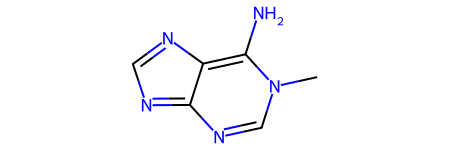

In [142]:
from rdkit import Chem
Chem.Descriptors.ExactMolWt(Chem.MolFromSmiles('Cn1cnc2ncnc-2c1N'))
Chem.MolFromSmiles('Cn1cnc2ncnc-2c1N')


# Opera
- VP (Log) in mmHg: Vapor Pressure experimental values between 15 and 30 deg C (majority at 25-20C)
- SDFs with VP (no explicit temperature...)